## **In this short assignment, you will be asked to build a neural network to classify different categories of clothes using the Fashion-MNIST dataset.**

Please submit your code and answers to the questions in the form of a Jupyter notebook, containing Pytorch code with explanations, along with a Markdown text explaining different parts if needed.

# Short Assignment: Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='https://github.com/RankJay/Deep-Learning-with-Pytorch-from-Facebook-Udacity/blob/master/Introduction%20to%20PyTorch/assets/fashion-mnist-sprite.png?raw=true' width=500px>

In this notebook, you'll build your own neural network. For the most part, the code would be very similar to what we had for the MNIST dataset.

First off, let's load the dataset through torchvision.

In [39]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

We will use the following function to show the images. There is no need to understand the code for this function in detail.

In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

tensor([0, 3, 2, 6, 8, 7, 0, 2, 8, 2, 5, 0, 5, 1, 6, 3, 8, 3, 7, 9, 0, 2, 7, 1,
        3, 9, 0, 8, 1, 4, 7, 1, 8, 0, 6, 3, 7, 3, 1, 7, 9, 7, 2, 0, 5, 1, 8, 9,
        4, 6, 3, 7, 5, 6, 7, 4, 7, 4, 1, 6, 8, 3, 7, 1])


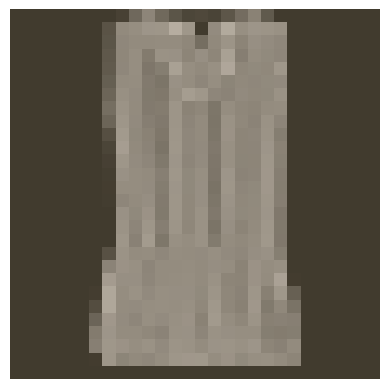

In [42]:
image, label = next(iter(trainloader))
imshow(image[0,:]);
print(label)

## Building the network

**Exercise 1**: Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the log-softmax from the forward pass. We also suggest you use 3 hidden layers of sizes 256, 128, 64.

In [43]:
# TODO: Define your network architecture here
from torch import nn
# Build a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1))

## Train the network

Now you can train your network. First we define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. The training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

No worries if you don't get everything now. We will talk about training neural networks in detail in Class 3. To finish the following exercise, you don't need to understand the details of training.

**Exercise 2**: Fill in the missing code to flatten each image in a batch into a 784 long vector.

There are a few options here: [`images.reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), [`images.resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_), and [`images.view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view).

* `images.reshape(a, b)` will return a new tensor with the same data as `images` with `a` rows and `b` columns.
* `images.resize_(a, b)` returns the same tensor with shape `(a,b)`. Here note that the underscore at the end of the method denotes that this method is performed **in-place** operation that changes directly the content of a given Tensor without making a copy. Here is a great forum thread to [read more about in-place operations](https://discuss.pytorch.org/t/what-is-in-place-operation/16244) in PyTorch.
* `images.view(a, b)` will return a new tensor with the same data as `images` with `a` rows and `b` columns.

I usually use `.view()`, but any of the three methods will work for this.

In [31]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X)
print(X.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [27]:
X_reshaped = X.reshape(3, 2)
print(X_reshaped)
print(X_reshaped.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


In [44]:
X_view = X.view(3, 2)
print(X_view)
print(X_view.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


In [29]:
X_resize = X.resize_(3, 2)
print(X_resize)
print(X_resize.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


In [32]:
X_resize = X.clone()
X_resize = X_resize.resize_(3, 2)
print(X_resize)
print(X_resize.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


In [45]:
X

tensor([[1, 2, 3],
        [4, 5, 6]])

In [46]:
X_flatten = X.view(-1)
print(X_flatten)
print(X_flatten.shape)

tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])


In [48]:
# Train the network here
from torch import optim
# Optimizers require the parameters to optimize and a learning rate
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003) # here we are using Adam optimizers

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        # TODO: Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        #Training pass
        output=model(images)
        loss = criterion(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.5143846250546258
Training loss: 0.3931048383304814
Training loss: 0.3548780158956422
Training loss: 0.33556016729965904
Training loss: 0.3174741580716964


## Test out your network

**Exercise 3**: Fill in the missing code to calculate the class probabilities `ps`.

We will use the following function to view the classification results. There is no need to understand the code for this function in detail.

In [49]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

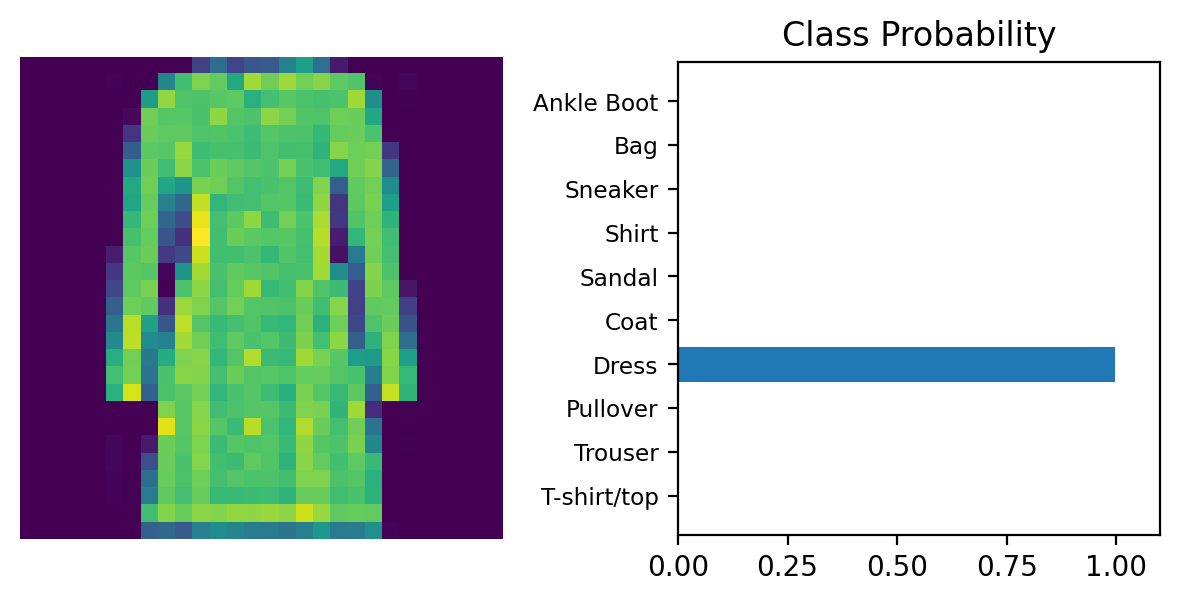

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the ouput (softmax) for img
with torch.no_grad():
    logps = model(img)

# TODO: Calculate the class probabilities for img
ps = torch.exp(logps)

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

<Axes: >

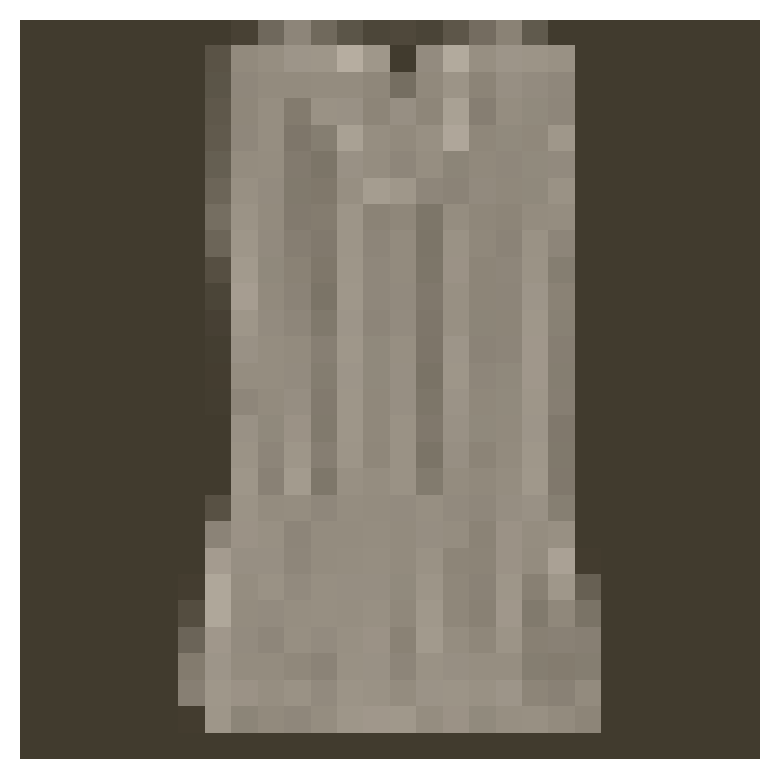

In [61]:
sample_image = image[0]
imshow(sample_image)